In [1]:
import os

os.chdir("../../../test_data/system_tests/proteoforms/mouse_tissues")

In [2]:
PROTEIN_QUANTITIES = "20231004_160735_20230926_Report.tsv.spectronaut_fragion_isotopes.renamed.aq_reformat.tsv.directlfq.protein_intensities.tsv"
SAMPLEMAP = "samplemap_200.tsv"


In [3]:
import pandas as pd

df_protquant = pd.read_csv(PROTEIN_QUANTITIES, sep="\t")
df_protquant = df_protquant.drop(columns="Unnamed: 0")
df_protquant = df_protquant.set_index("protein")
display(df_protquant)


,20230926_OA2_CaWe_aQuant_mBrain_200ng_01.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_02.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_03.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_04.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_05.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_06.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_07.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_08.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_09.raw,20230926_OA2_CaWe_aQuant_mBrain_200ng_10.raw,...,20230926_OA2_CaWe_aQuant_mTestis_200ng_01.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_02.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_03.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_04.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_05.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_06.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_07.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_08.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_09.raw,20230926_OA2_CaWe_aQuant_mTestis_200ng_10.raw
protein,,,,,,,,,,,,,,,,,,,,,
A0A023T778;P61327;Q9CQL1,9.833511e+06,1.097485e+07,9.939512e+06,1.002311e+07,1.061791e+07,1.228298e+07,1.042083e+07,1.015860e+07,1.041019e+07,9.858885e+06,...,1.292108e+07,1.164821e+07,1.291161e+07,1.361843e+07,1.370265e+07,1.252694e+07,1.467854e+07,1.468370e+07,1.267941e+07,1.271573e+07
A0A024QYR9;O08586,1.969699e+07,1.977906e+07,2.198865e+07,2.343141e+07,2.024098e+07,1.969701e+07,1.854126e+07,1.980506e+07,2.206367e+07,2.075641e+07,...,5.850656e+06,5.543541e+06,6.583102e+06,5.092622e+06,6.476507e+06,5.834456e+06,5.770573e+06,6.629162e+06,6.208854e+06,6.400108e+06
A0A067XG46;A2ADP2;A2ADP5;Q3UWJ5;Q8CDM3;Q9R0X5;Q9R0X5-2;Q9R0X5-3;Q9R0X5-4;Q9R0X5-5,1.455826e+06,2.575834e+06,2.092678e+06,2.129918e+06,2.181782e+06,2.073965e+06,2.061425e+06,2.157533e+06,2.240839e+06,2.385175e+06,...,1.021130e+06,1.159311e+06,0.000000e+00,1.346957e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A0A075B5K2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.288567e+05,2.719273e+05,0.000000e+00,1.244614e+05,1.292514e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
A0A075B5K6;P03976,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,3.549433e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V9GWV1,1.033860e+06,1.141149e+06,1.206690e+06,8.595054e+05,9.492300e+05,7.679067e+05,5.847886e+05,1.043740e+06,1.347519e+06,8.843526e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
V9GX34,5.412087e+06,5.767924e+06,4.965635e+06,6.917219e+06,4.545221e+06,5.886472e+06,5.680070e+06,5.108690e+06,5.571034e+06,5.282060e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
V9GXG1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.253784e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [4]:
df_samplemap = pd.read_csv(SAMPLEMAP, sep="\t")
sample2cond = dict(zip(df_samplemap["sample"], df_samplemap["condition"]))
display(sample2cond)

{'20230926_OA2_CaWe_aQuant_mBrain_200ng_01.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_02.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_03.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_04.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_05.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_06.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_07.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_08.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_09.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mBrain_200ng_10.raw': 'brain',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_01.raw': 'heart',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_02.raw': 'heart',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_03.raw': 'heart',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_04.raw': 'heart',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_05.raw': 'heart',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_06.raw': 'heart',
 '20230926_OA2_CaWe_aQuant_mHeart_200ng_07.raw': 'heart',
 '20230926_OA2

/Users/constantin/opt/anaconda3/envs/alphaquant/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/constantin/workspace/constiutils/constiutils/pca.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(eigenvalues[idx_of_component] / summed_eigenvalues)


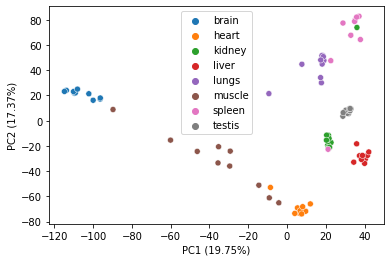

In [11]:
import constiutils.pca as cupca
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

X = df_protquant.values.transpose()
labels = [sample2cond[sample] for sample in df_protquant.columns if sample in sample2cond]

cupca.perform_pca_and_scatterplot(X = X, labels = labels, idx_component1 = 0, idx_component2 = 1, ax  = ax)
fig.savefig("pca_protein_quantities.pdf", dpi=300, bbox_inches="tight")


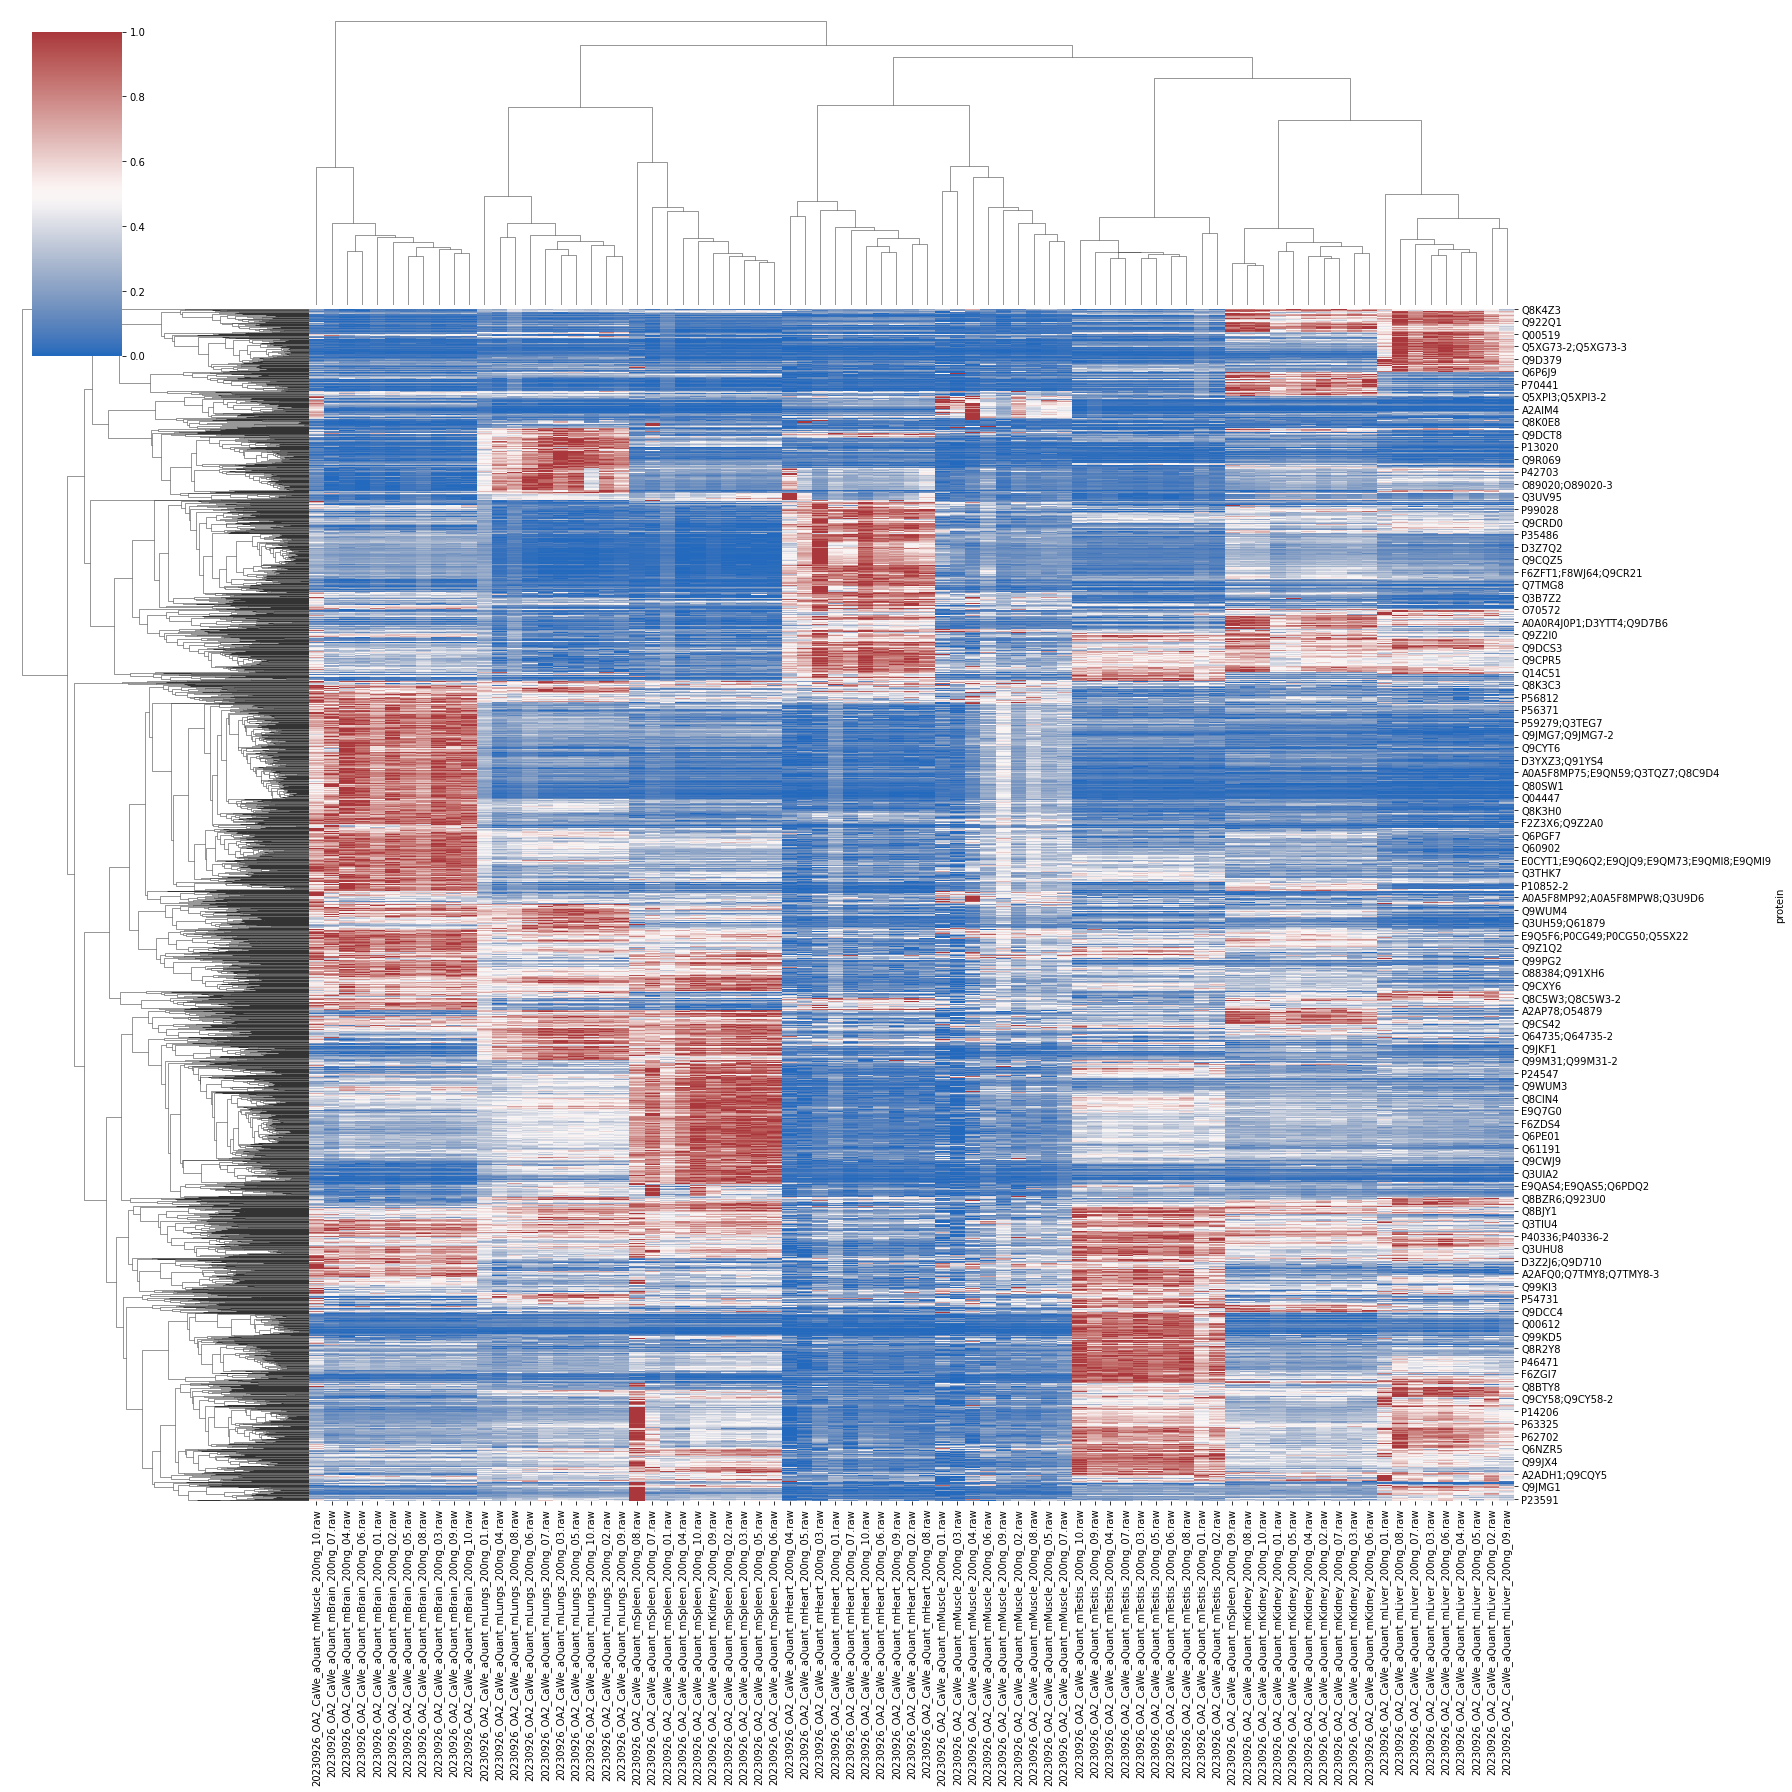

In [10]:
import seaborn as sns
import numpy as np
fig = sns.clustermap(data=df_protquant.replace(0, np.nan).dropna(), col_cluster=True, row_cluster=True, cmap="vlag", figsize=(25, 25),standard_scale=0)
#save as pdf
fig.savefig("clustermap.pdf", dpi=300, bbox_inches="tight")